## Lending Club Loan Data

In this notebook we will analyze the lending club loan data and try to implement a machine learning classification model which will help us in identifying if the loan will end up in Default or not.

### About Lending Club

Lending Club is a peer to peer lending company based in the United States, in which investors provide funds for potential borrowers and investors earn a profit depending on the risk they take (the borrowers credit score). Lending Club provides the "bridge" between investors and borrowers

### About the Data Set

The csv files contain complete loan data for all loans issued through the 2007-2015, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of about 890 thousand observations and 75 variables.  

Data set can be downloaded from [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data)

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

### Loading the Data Set

In [2]:
data = pd.read_csv('loan.csv', low_memory=False)

In [3]:
data.shape

(887379, 74)

Let's take a look at the top 5 columns

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Loan_Status column is our target variable which will tell us the status of the loan. 

In [6]:
data['loan_status'].value_counts().sort_values(ascending=False)

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

As we can see, this is highly imbalanced data set with majority of the loan being in current state and not many loans being in Default state. Let's plot them out.

Text(0.5,1,'Status Of the loan')

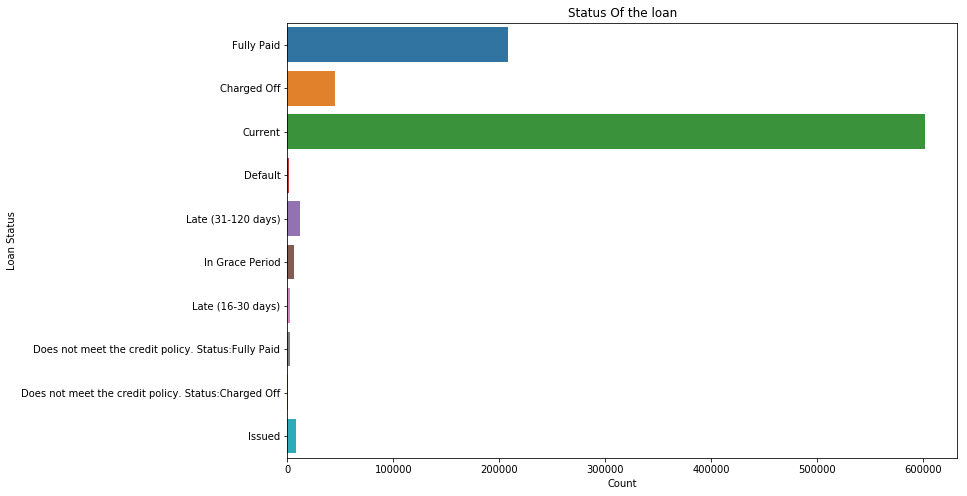

In [7]:
plt.figure(figsize=(12,8))
sns.countplot(y='loan_status', data=data)
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.title('Status Of the loan')

In [8]:
data = data.rename(columns={"loan_amnt":"loan_amount", "funded_amnt":"funded_amount", "funded_amnt_inv": "investor_funds", 
                    "int_rate": "interest_rate", "annual_inc": "annual_income"})

### Exploratory Data Analysis (EDA)

Let's start by plotting some the feature columns which will help us in determining the distribution of the data

/home/jinudaniel74/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Total committed by Investors')

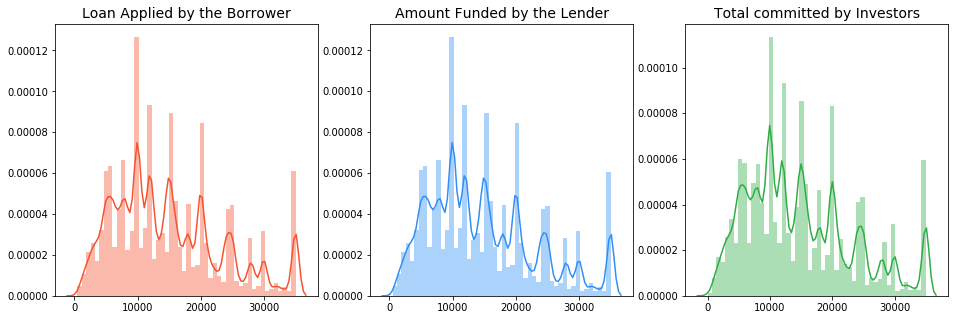

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
loan_amount = data["loan_amount"].values
funded_amount = data["funded_amount"].values
investor_funds = data["investor_funds"].values

sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

In [10]:
data["issue_d"].head()
dt_series = pd.to_datetime(data['issue_d'])
data['year'] = dt_series.dt.year

Text(0,0.5,'Average loan amount issued')

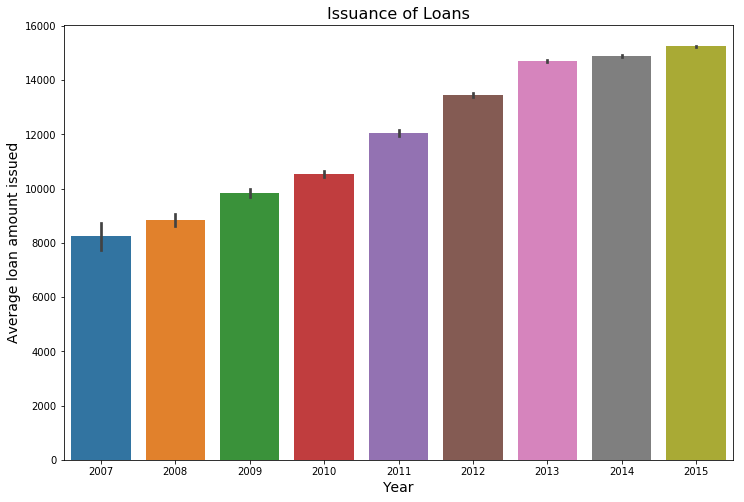

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x="year", y="loan_amount", data=data)
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

As you can see, the average loan amount issued increased considerably from 2011 onwards. This might indicate a pick up in economy.

Not let us analyze the missing values in columns in the dataset.

In [12]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [13]:
# Missing values statistics
miss_values = null_values(data)
miss_values.head(20)

Dataframe has 75 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
dti_joint,886870,99.9
annual_inc_joint,886868,99.9
verification_status_joint,886868,99.9
il_util,868762,97.9
mths_since_rcnt_il,866569,97.7
total_cu_tl,866007,97.6
inq_fi,866007,97.6
all_util,866007,97.6
max_bal_bc,866007,97.6
open_rv_24m,866007,97.6


Segragate the loan status column into good loan and bad loan. I am assuming that loan which are defaulted, late by certain days and which do not meet the credit policy as bad loan. I am not sure if this is correct segragation but lets continue with this split.

In [14]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", 
            "Late (16-30 days)", "Late (31-120 days)"]

data['loan_condition'] = np.nan
def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'

data['loan_condition'] = data['loan_status'].apply(loan_condition)

In [15]:
data['loan_condition'].value_counts()

Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

As you can see this is an imbalanced dataset. Majority of the loan status is good loan and lot less with bad loan status.

Text(0,0.5,'Loan Amount')

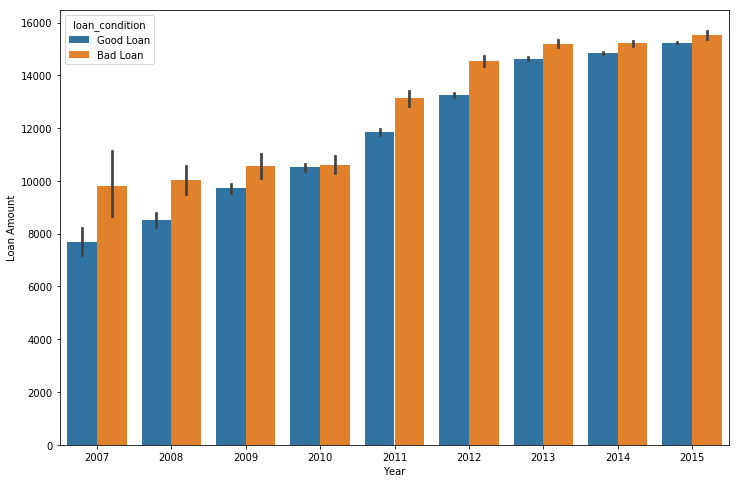

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x='year', y='loan_amount', hue="loan_condition", data=data)
plt.xlabel('Year')
plt.ylabel('Loan Amount')

In this dataset we have a lot of columns with data type as object. Check the distribution of the different data types in our data set.

Text(0,0.5,'Data type')

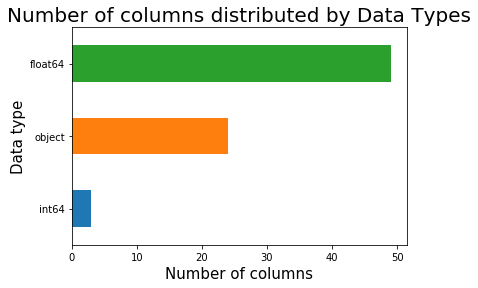

In [17]:
data.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [18]:
data["emp_length"].value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

Clean the emp_length column to include only the years of experience of the customer. Fill the blank values with 0 as I am assuming these people do not have an experience.

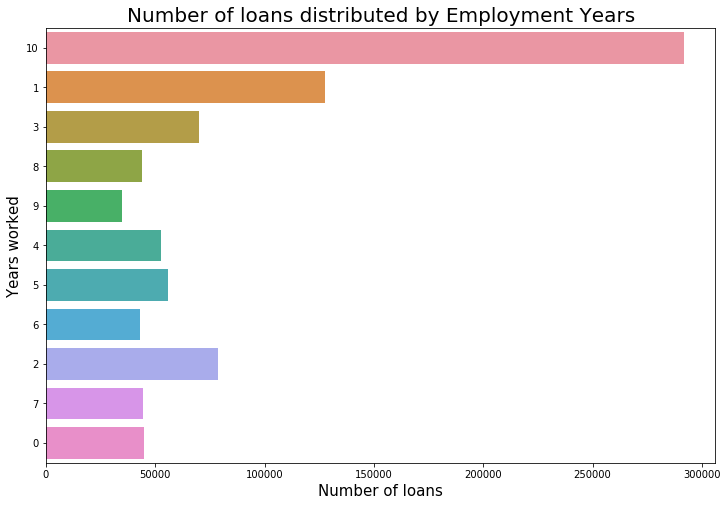

In [19]:
data['emp_length'].fillna(value=0,inplace=True)

data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

plt.figure(figsize=(12,8))
sns.countplot(y='emp_length', data=data)
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

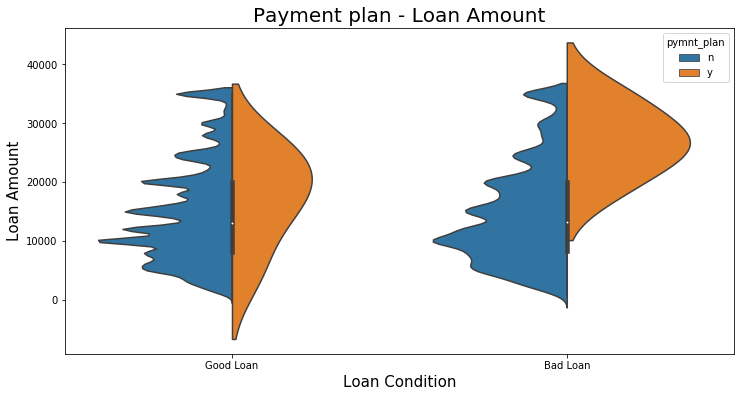

In [20]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="loan_condition",y="loan_amount",data=data, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("Loan Condition", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

Text(0.5,1,'Analyzing Default count by Year')

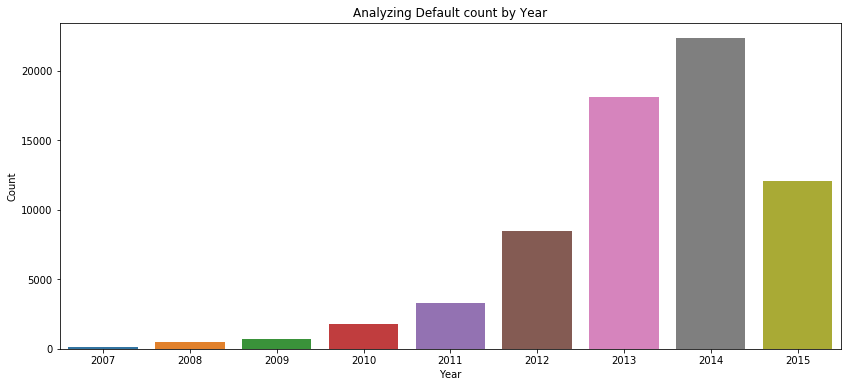

In [21]:
plt.figure(figsize = (14,6))
sns.countplot(x="year", data=data[data["loan_condition"] == "Bad Loan"])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Analyzing Default count by Year")

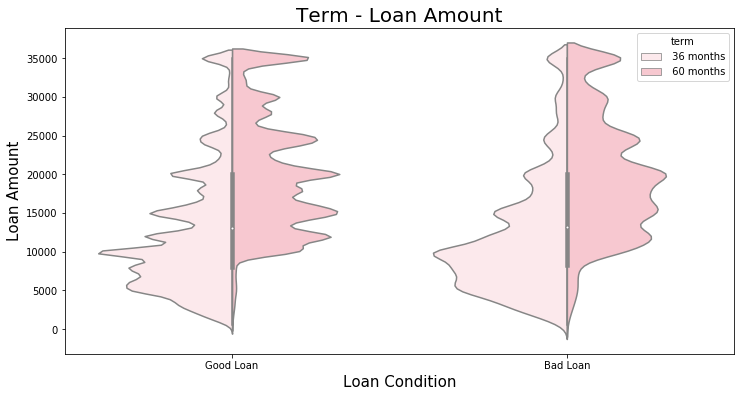

In [22]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="loan_condition",y="loan_amount",data=data, hue="term", split=True,color='pink')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("Loan Condition", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [23]:
data['application_type'].value_counts()

INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

Text(0.5,1,'Applicate Type Loan Amount')

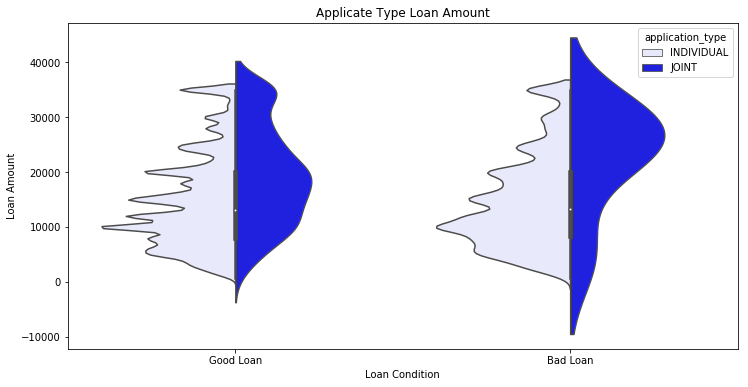

In [24]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="loan_condition", y="loan_amount", data=data, hue="application_type", split=True, color="blue")
plt.xlabel("Loan Condition")
plt.ylabel("Loan Amount")
plt.title("Applicate Type Loan Amount")

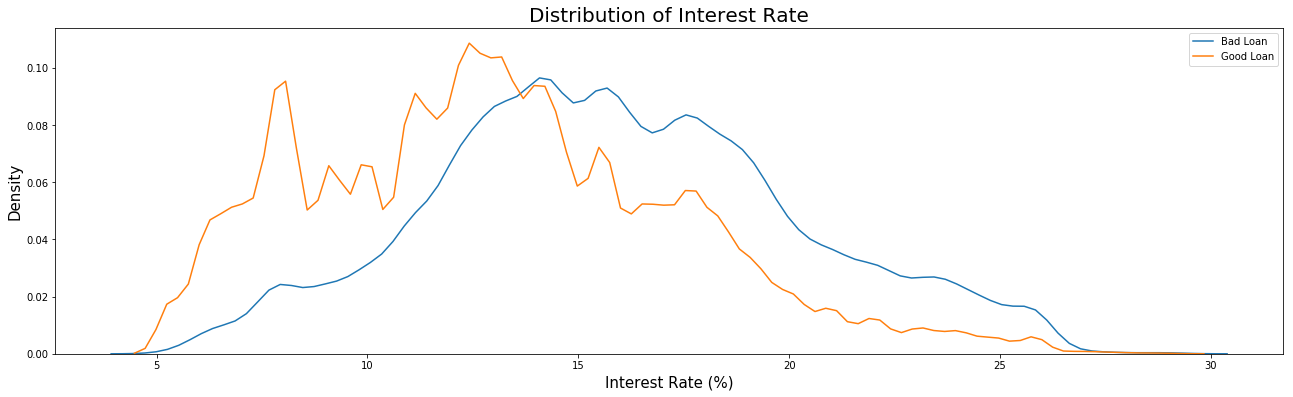

In [25]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(data.loc[data['loan_condition'] == 'Bad Loan', 'interest_rate'], label = 'Bad Loan')
sns.kdeplot(data.loc[data['loan_condition'] == "Good Loan", 'interest_rate'], label = 'Good Loan');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

As you can see, for higher interest rate, chances of the loan turning bas becomes higher which is on expected lines.

In [26]:
data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

Split the Address State into different regions

In [27]:
# https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

data['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

data['region'] = data['addr_state'].apply(finding_regions)

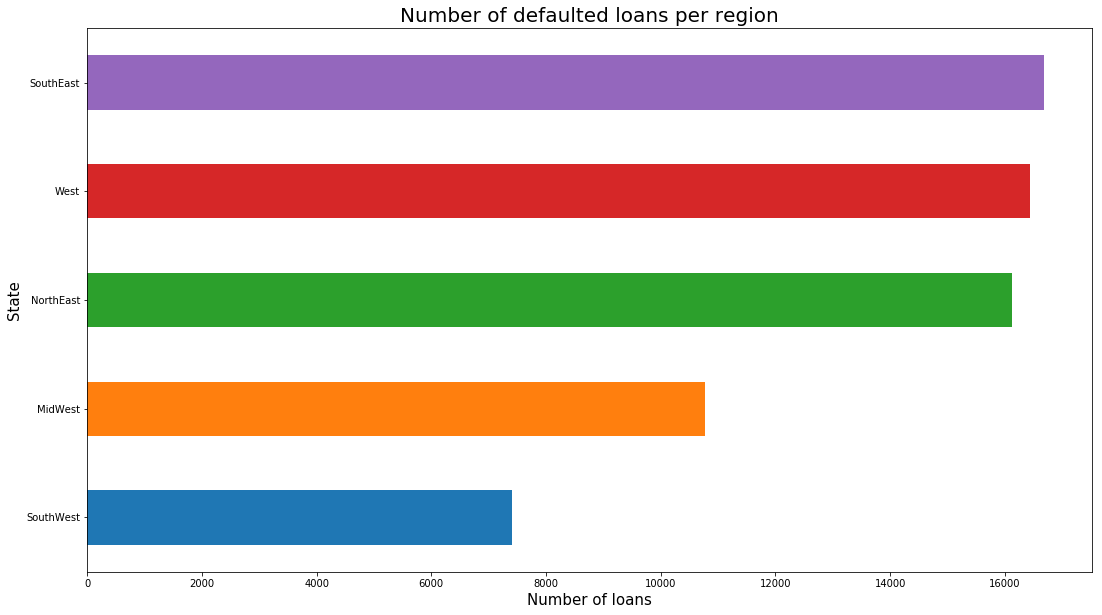

In [28]:
fig = plt.figure(figsize=(18,10))
data[data['loan_condition']== 'Bad Loan'].groupby('region')['loan_condition'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per region',fontsize=20);

Let me remove all the columns with more than 70% missing data as they won't be helping for modelling and exploration.

In [29]:
temp = [i for i in data.count() < 887379 *0.30]
data.drop(data.columns[temp], axis= 1, inplace=True)

In [30]:
data['Target'] = data['loan_condition'].map({"Good Loan": 0, "Bad Loan" : 1})
data['Target'].value_counts()

0    819950
1     67429
Name: Target, dtype: int64

In [31]:
corr = data.corr()['Target'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 installment                0.014124
revol_util                 0.050134
total_rec_int              0.067069
inq_last_6mths             0.080892
total_rec_late_fee         0.166320
interest_rate              0.175450
collection_recovery_fee    0.269621
recoveries                 0.390846
Target                     1.000000
policy_code                     NaN
Name: Target, dtype: float64

Most Negative Correlations:
 member_id          -0.190876
id                 -0.190691
year               -0.165122
out_prncp          -0.158544
out_prncp_inv      -0.158540
last_pymnt_amnt    -0.101260
total_rec_prncp    -0.095991
total_pymnt_inv    -0.043552
total_pymnt        -0.042515
total_rev_hi_lim   -0.039699
Name: Target, dtype: float64


In [32]:
data['member_id'].value_counts().head()

58732538    1
353782      1
56268296    1
59631955    1
73070084    1
Name: member_id, dtype: int64

In [33]:
data['emp_title'].value_counts().head()

Teacher             13469
Manager             11240
Registered Nurse     5525
Owner                5376
RN                   5355
Name: emp_title, dtype: int64

In [34]:
data.drop(['id','member_id','emp_title','title','zip_code','url'],axis=1,inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 52 columns):
loan_amount                   887379 non-null float64
funded_amount                 887379 non-null float64
investor_funds                887379 non-null float64
term                          887379 non-null object
interest_rate                 887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_length                    887379 non-null object
home_ownership                887379 non-null object
annual_income                 887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status                   887379 non-null object
pymnt_plan                    887379 non-null object
purpose                       887379 non-null object
addr_state                    88737

In [36]:
data['issue_d']= pd.to_datetime(data['issue_d']).apply(lambda x: int(x.strftime('%Y')))
data['last_pymnt_d']= pd.to_datetime(data['last_pymnt_d'].fillna('2016-01-01')).apply(lambda x: int(x.strftime('%m')))
data['last_credit_pull_d']= pd.to_datetime(data['last_credit_pull_d'].fillna("2016-01-01")).apply(lambda x: int(x.strftime('%m')))
data['earliest_cr_line']= pd.to_datetime(data['earliest_cr_line'].fillna('2001-08-01')).apply(lambda x: int(x.strftime('%m')))
data['next_pymnt_d'] = pd.to_datetime(data['next_pymnt_d'].fillna(value = '2016-02-01')).apply(lambda x:int(x.strftime("%Y")))

In [37]:
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].median())

In [38]:
data.drop(columns=['loan_condition'], axis = 1, inplace=True)

In [39]:
data.dropna(inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816722 entries, 42535 to 887378
Data columns (total 51 columns):
loan_amount                   816722 non-null float64
funded_amount                 816722 non-null float64
investor_funds                816722 non-null float64
term                          816722 non-null object
interest_rate                 816722 non-null float64
installment                   816722 non-null float64
grade                         816722 non-null object
sub_grade                     816722 non-null object
emp_length                    816722 non-null object
home_ownership                816722 non-null object
annual_income                 816722 non-null float64
verification_status           816722 non-null object
issue_d                       816722 non-null int64
loan_status                   816722 non-null object
pymnt_plan                    816722 non-null object
purpose                       816722 non-null object
addr_state                    81

In [41]:
data['Target'].value_counts()

0    760341
1     56381
Name: Target, dtype: int64

### Training the Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
from sklearn import preprocessing

In order to handle categorical data, we have two methods - Label Encoder or One Hot encoding.  
LabelEncoder can turn dog,cat,dog,mouse,cat into 1,2,1,3,2 but then the imposed ordinality means that the average of dog and mouse is cat. One-Hot-Encoding has a the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.  
So what we will do is if the numbre of unique values in a column is less than or equal to 2, we will use a Label Encoder else will One Hot Encode them.

In [44]:
count = 0
for col in data:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            data[col] = le.fit_transform(data[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [45]:
data.shape

(816722, 51)

In [46]:
data = pd.get_dummies(data)
print(data.shape)

(816722, 182)


Split the data set into Train and Test set. I am using the stratify option which will help us in making sure that we have a same number of target variables in our train and test set. Check out this [stackoverflow thread](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn) to know more about the stratify option.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Target',axis=1), data['Target'], test_size=0.15, 
                                                    random_state=101, stratify=data['Target'].values)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [49]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))   

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001,random_state=21)

log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=21,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [51]:
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00    114052
          1       1.00      1.00      1.00      8457

avg / total       1.00      1.00      1.00    122509


Confusion Matrix: 
 [[114051      1]
 [     0   8457]]



In [52]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=21)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [53]:
print_score(clf_rf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 1.0000

Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00    114052
          1       1.00      1.00      1.00      8457

avg / total       1.00      1.00      1.00    122509


Confusion Matrix: 
 [[114052      0]
 [     0   8457]]

